In [2]:
import keras
from keras import layers,models
from keras import datasets
from keras.utils import np_utils  # one-hot Encoding
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
(X_train,y_train),(X_test,y_test)=datasets.fashion_mnist.load_data()
print(X_train[-1].shape)
img_rows,img_cols=X_train.shape[1:]
print(img_rows)
print(img_cols)

(28, 28)
28
28


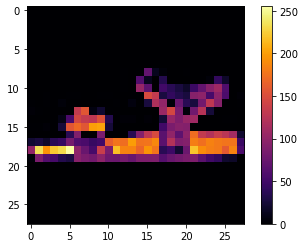

In [19]:
plt.figure()
plt.imshow(X_train[-1],cmap="inferno")
plt.colorbar()
plt.grid(False)
plt.show()

In [73]:
from keras import backend

if backend.image_data_format=="channels_first":
    X_train=X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
    X_test=X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
    input_shape=(1,img_rows,img_cols)
else:
    X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
    X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
    input_shape=(img_rows,img_cols,1)

In [74]:
num_classes=10
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")

X_train=(X_train-X_train.mean())/(X_train.std()-X_train.var())
X_test=(X_test-X_test.mean())/(X_test.std()-X_test.var())

Y_train=np_utils.to_categorical(y_train,num_classes)

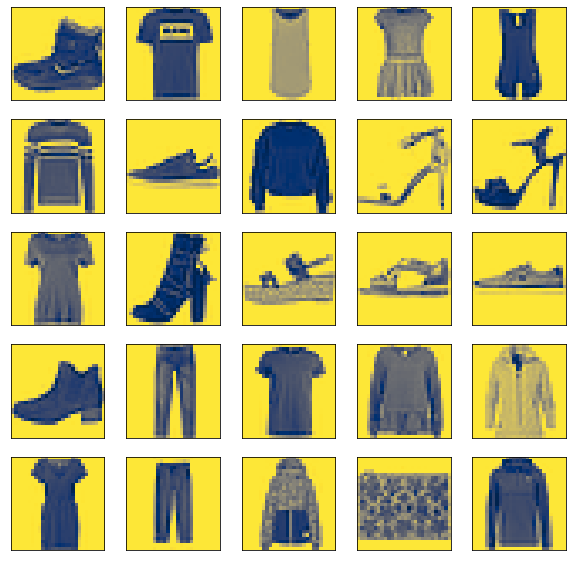

In [75]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(X_train[i].reshape(28,28),cmap=plt.cm.cividis)

plt.show()

In [76]:
model=models.Sequential()

model.add(layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# fcn직전에 직렬화
model.add(layers.Flatten())
# fcn
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes,activation="softmax"))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               921700    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [77]:
model.compile("adam","categorical_crossentropy",metrics=["accuracy"])

In [78]:
# 시각화
# fit, 트레이닝할 때 나오는 로그 메세지를 모아서 리턴 - history
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend("Training","Validation")
   
    plt.savefig("C:/바탕 화면/playdata/ice/Loss_plot.png",dpi=300)
    plt.show()
    
def plot_acc(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.legend()
    plt.title("accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("Epoch")
    plt.savefig("C:/바탕 화면/playdata/ice/Accuracy_plot.png",dpi=300)
    plt.show()
    
history=model.fit(X_train,Y_train,epochs=25,batch_size=100,validation_split=0.2)

ValueError: Error when checking target: expected dense_10 to have 2 dimensions, but got array with shape (60000, 10, 10, 10)

In [72]:
plt_loss(history)

NameError: name 'plt_loss' is not defined

In [62]:
plt_acc(history)

NameError: name 'plt_acc' is not defined

In [80]:
model.evaluate(X_test,y_test,batch_size=100)


ValueError: Error when checking target: expected dense_10 to have shape (10,) but got array with shape (1,)

In [79]:
model.save("C:\바탕 화면\playdata\ice/fasion_mnist.h5")